# Prediction Diabets Datset Using Random Forest Classifier

# Dataset Story

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To exp

ress the final result 1 is Yes and 0 is No


# Import Necessary Libraries

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix

!pip install joblib
import joblib

import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [43]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6000,0.6270,50,1
1,1,85,66,29,0,26.6000,0.3510,31,0
2,8,183,64,0,0,23.3000,0.6720,32,1
3,1,89,66,23,94,28.1000,0.1670,21,0
4,0,137,40,35,168,43.1000,2.2880,33,1


# General Information About to Dataset

In [44]:
def check_df(dataframe,head=5):
  print(20*"#", "Head", 20*"#")
  print(dataframe.head(head))
  print(20*"#", "Tail", 20*"#")
  print(dataframe.tail(head))
  print(20*"#", "Shape", 20*"#")
  print(dataframe.shape)
  print(20*"#", "Types", 20*"#")
  print(dataframe.dtypes)
  print(20*"#", "NA", 20*"#")
  print(dataframe.isnull().sum())
  print(20*"#", "Qurtiles", 20*"#")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [45]:
check_df(df)

#################### Head ####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.6000                    0.6270   50        1
1            1       85             66             29        0 26.6000                    0.3510   31        0
2            8      183             64              0        0 23.3000                    0.6720   32        1
3            1       89             66             23       94 28.1000                    0.1670   21        0
4            0      137             40             35      168 43.1000                    2.2880   33        1
#################### Tail ####################
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180 32.9000                    0.1710   63        0
764           

# Analysis of Categorical and Numerical Variables

In [46]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car, num_but_cat

In [47]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")
print(f"Num_but_cat: {len(num_but_cat)}")

Observations: 768
Variables: 9
Cat_cols: 1
Num_cols: 8
Cat_but_car: 0
Num_but_cat: 1


In [48]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)

In [49]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
  for col in cat_cols:
    cat_summary(dataframe, col, plot=True)

         Outcome  Ration
Outcome                 
0            500 65.1042
1            268 34.8958
##########################################


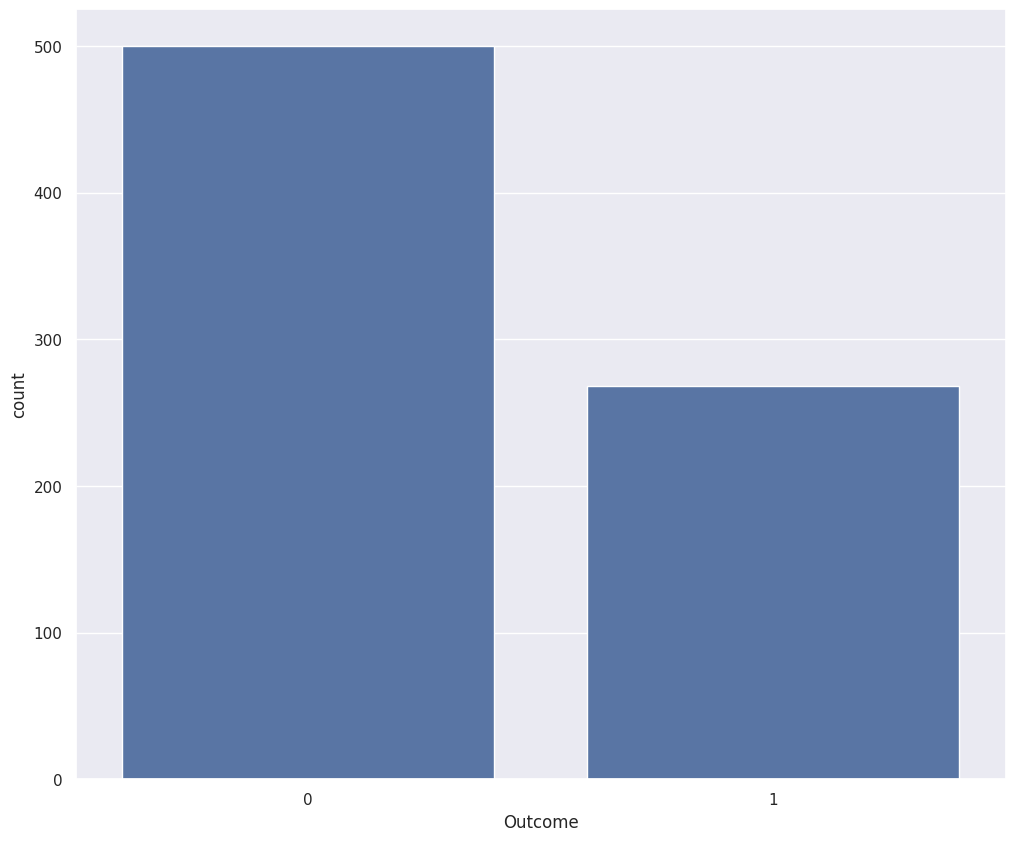

In [50]:
cat_summary_df(df)

In [51]:
def num_summary(dataframe, num_col, plot=False):
  print(50*"#", num_col ,50*"#")
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.ylabel(num_col)
    plt.show(block=True)

In [52]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

################################################## Pregnancies ##################################################
count   768.0000
mean      3.8451
std       3.3696
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       1.0000
30%       1.0000
40%       2.0000
50%       3.0000
60%       4.0000
70%       5.0000
80%       7.0000
90%       9.0000
95%      10.0000
99%      13.0000
max      17.0000
Name: Pregnancies, dtype: float64


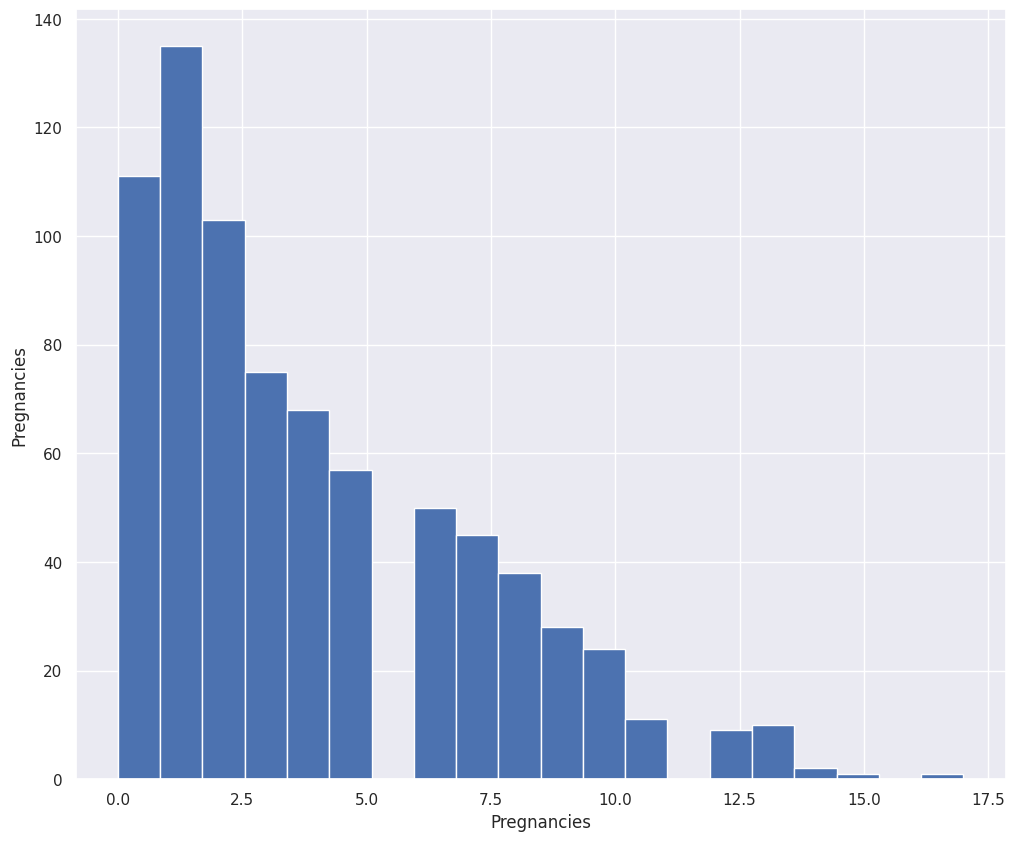

################################################## Glucose ##################################################
count   768.0000
mean    120.8945
std      31.9726
min       0.0000
1%       57.0000
5%       79.0000
10%      85.0000
20%      95.0000
30%     102.0000
40%     109.0000
50%     117.0000
60%     125.0000
70%     134.0000
80%     147.0000
90%     167.0000
95%     181.0000
99%     196.0000
max     199.0000
Name: Glucose, dtype: float64


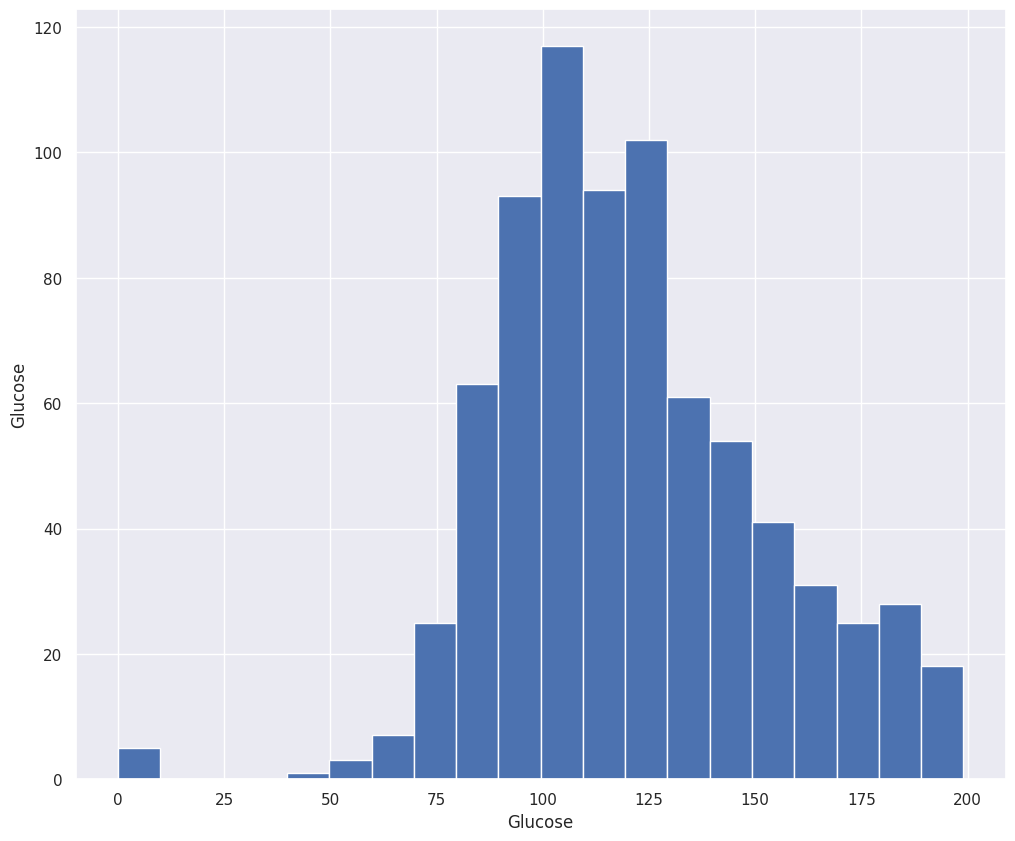

################################################## BloodPressure ##################################################
count   768.0000
mean     69.1055
std      19.3558
min       0.0000
1%        0.0000
5%       38.7000
10%      54.0000
20%      60.0000
30%      64.0000
40%      68.0000
50%      72.0000
60%      74.0000
70%      78.0000
80%      82.0000
90%      88.0000
95%      90.0000
99%     106.0000
max     122.0000
Name: BloodPressure, dtype: float64


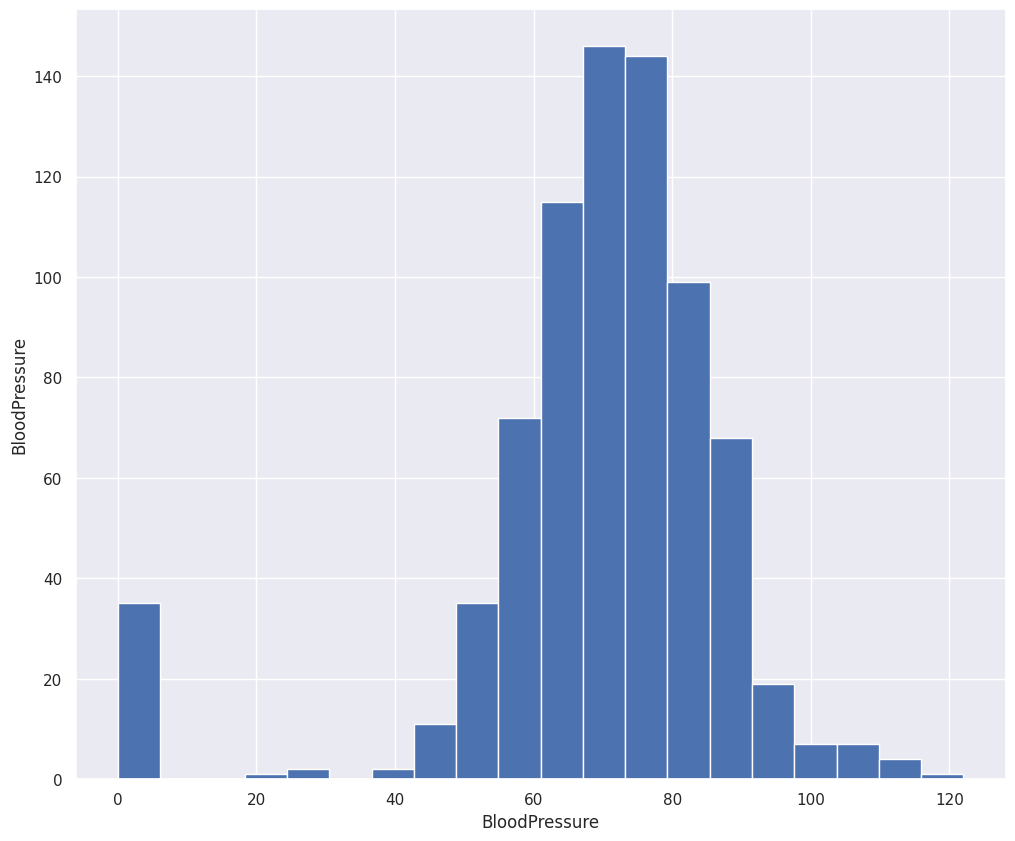

################################################## SkinThickness ##################################################
count   768.0000
mean     20.5365
std      15.9522
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       0.0000
30%       8.2000
40%      18.0000
50%      23.0000
60%      27.0000
70%      31.0000
80%      35.0000
90%      40.0000
95%      44.0000
99%      51.3300
max      99.0000
Name: SkinThickness, dtype: float64


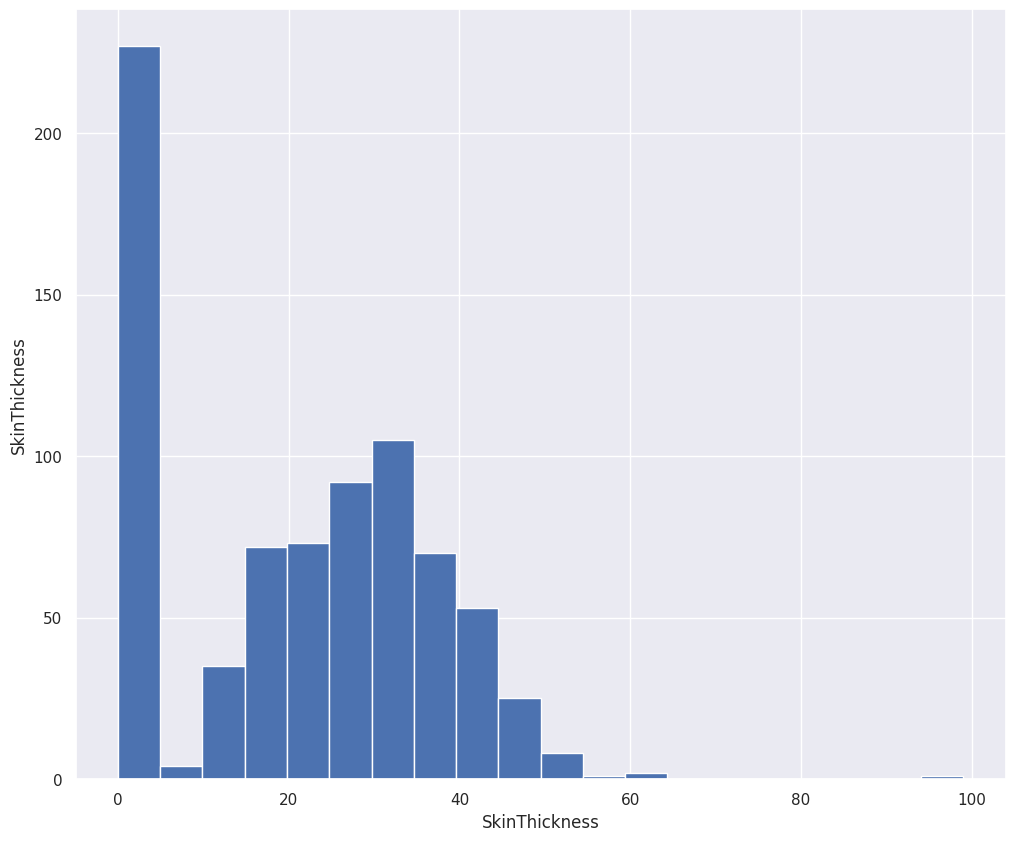

################################################## Insulin ##################################################
count   768.0000
mean     79.7995
std     115.2440
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       0.0000
30%       0.0000
40%       0.0000
50%      30.5000
60%      72.2000
70%     106.0000
80%     150.0000
90%     210.0000
95%     293.0000
99%     519.9000
max     846.0000
Name: Insulin, dtype: float64


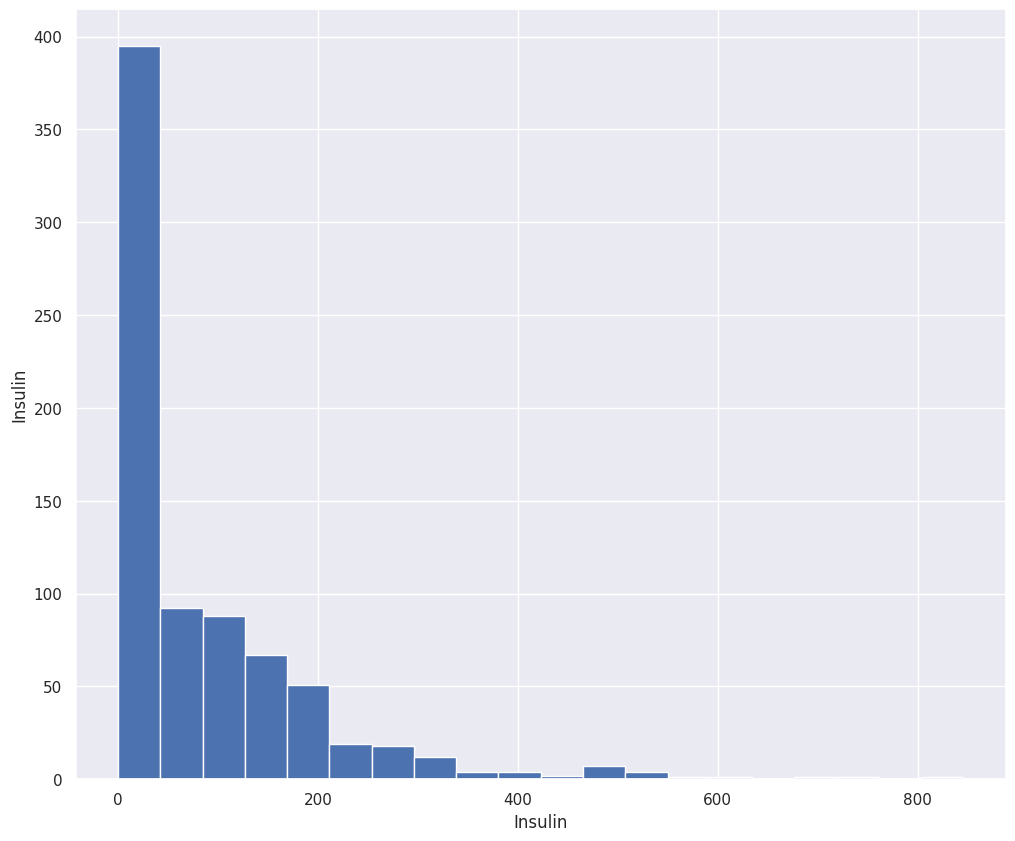

################################################## BMI ##################################################
count   768.0000
mean     31.9926
std       7.8842
min       0.0000
1%        0.0000
5%       21.8000
10%      23.6000
20%      25.9000
30%      28.2000
40%      30.1000
50%      32.0000
60%      33.7000
70%      35.4900
80%      37.8000
90%      41.5000
95%      44.3950
99%      50.7590
max      67.1000
Name: BMI, dtype: float64


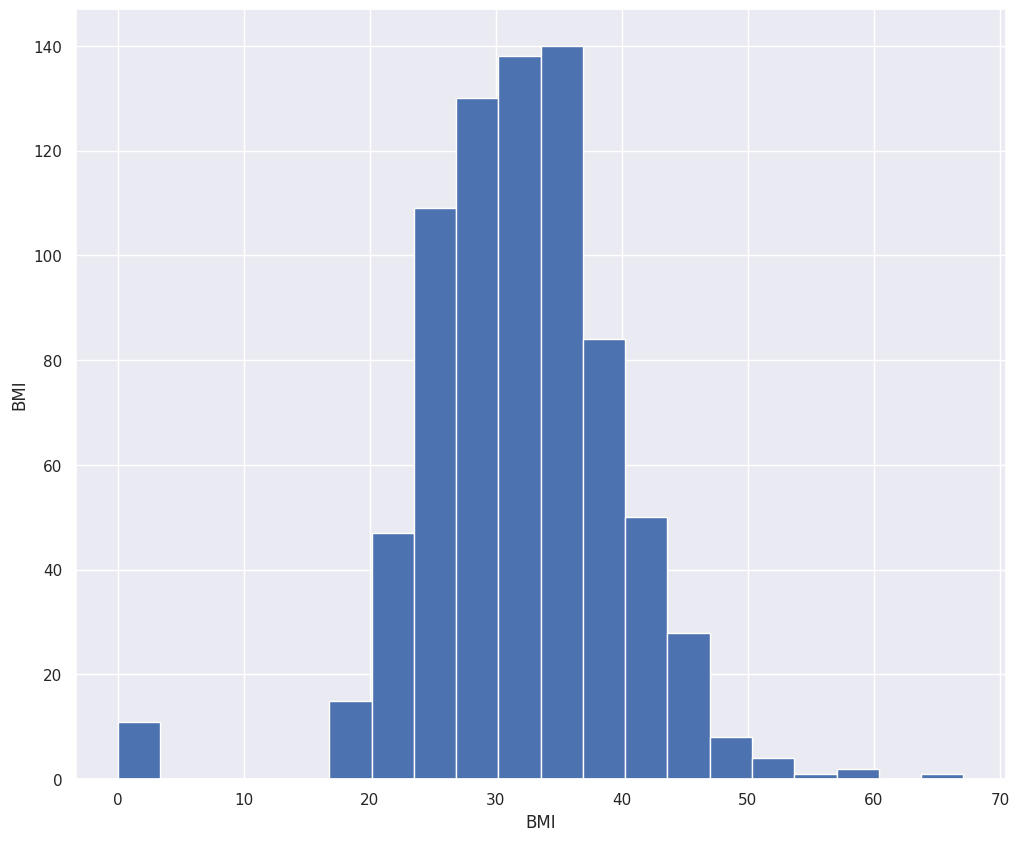

################################################## DiabetesPedigreeFunction ##################################################
count   768.0000
mean      0.4719
std       0.3313
min       0.0780
1%        0.0947
5%        0.1404
10%       0.1650
20%       0.2194
30%       0.2590
40%       0.3028
50%       0.3725
60%       0.4542
70%       0.5637
80%       0.6870
90%       0.8786
95%       1.1328
99%       1.6983
max       2.4200
Name: DiabetesPedigreeFunction, dtype: float64


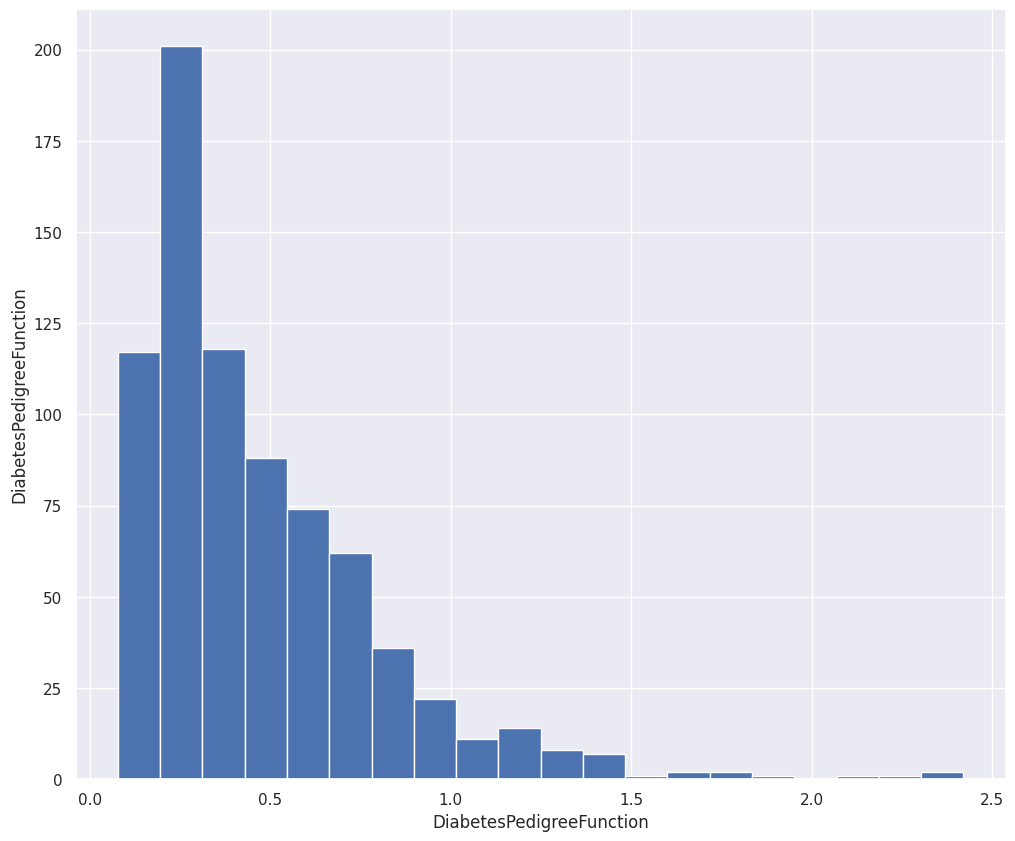

################################################## Age ##################################################
count   768.0000
mean     33.2409
std      11.7602
min      21.0000
1%       21.0000
5%       21.0000
10%      22.0000
20%      23.0000
30%      25.0000
40%      27.0000
50%      29.0000
60%      33.0000
70%      38.0000
80%      42.6000
90%      51.0000
95%      58.0000
99%      67.0000
max      81.0000
Name: Age, dtype: float64


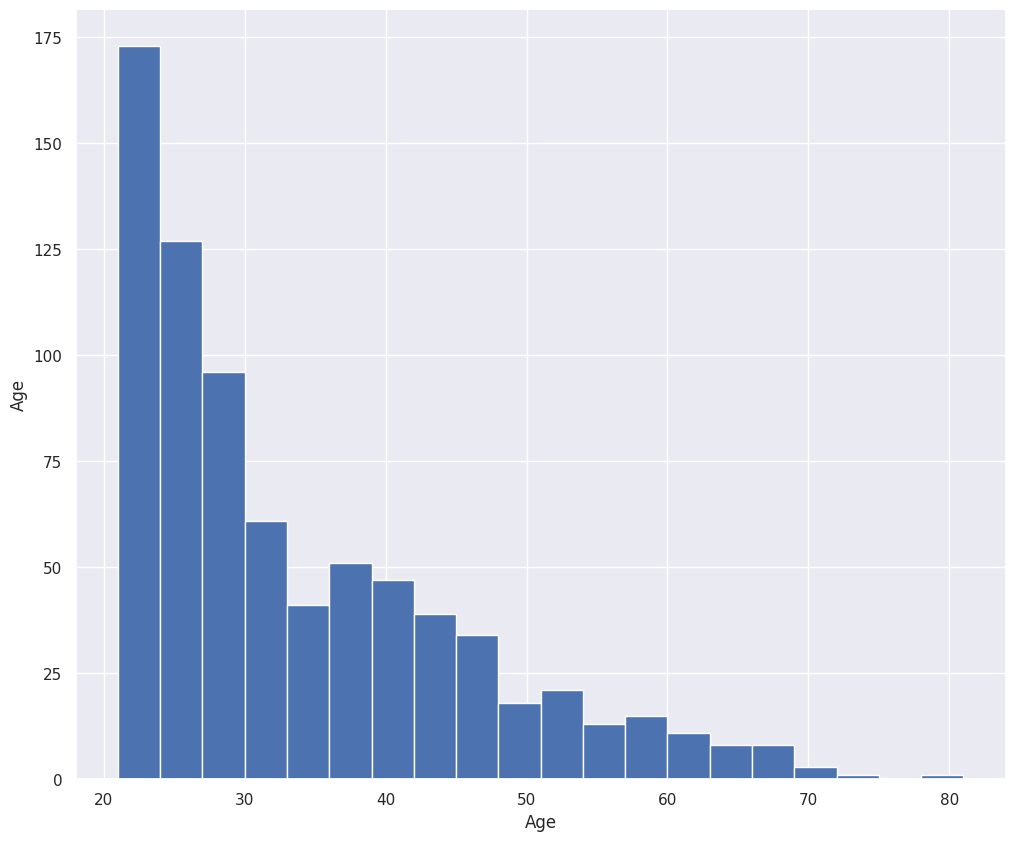

In [53]:
num_summary_df(df)

In [54]:
def plot_num_summary(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  plt.figure(figsize=(12,4))
  for index, col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    plt.tight_layout()
    dataframe[col].hist(bins=20)
    plt.title(col)

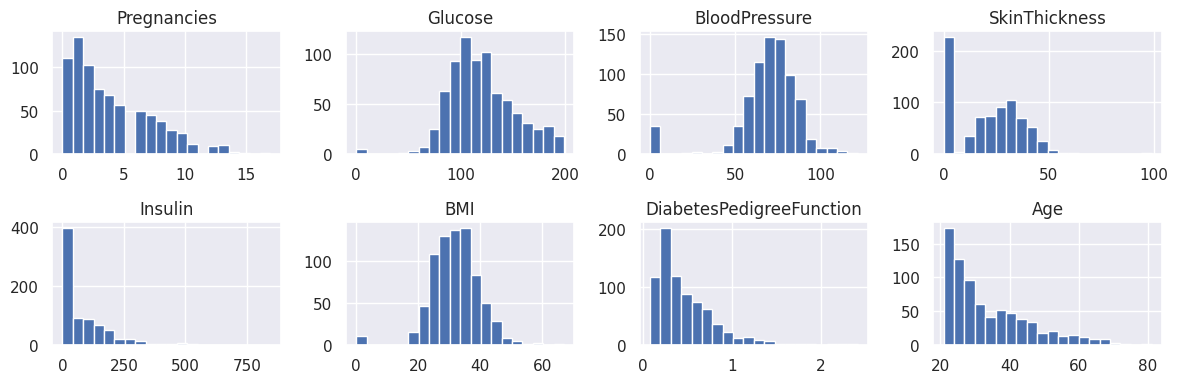

In [55]:
plot_num_summary(df)

# Target Analysis

In [56]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(f"##################### {target} -> {numerical_col} #####################")
    print(pd.DataFrame({"Target Mean": dataframe.groupby(target)[numerical_col].mean()}))

In [57]:
def target_summary_with_num_df(dataframe, target):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in num_cols:
        target_summary_with_num(dataframe, target, col)

In [58]:
target_summary_with_num_df(df, "Outcome")

##################### Outcome -> Pregnancies #####################
         Target Mean
Outcome             
0             3.2980
1             4.8657
##################### Outcome -> Glucose #####################
         Target Mean
Outcome             
0           109.9800
1           141.2575
##################### Outcome -> BloodPressure #####################
         Target Mean
Outcome             
0            68.1840
1            70.8246
##################### Outcome -> SkinThickness #####################
         Target Mean
Outcome             
0            19.6640
1            22.1642
##################### Outcome -> Insulin #####################
         Target Mean
Outcome             
0            68.7920
1           100.3358
##################### Outcome -> BMI #####################
         Target Mean
Outcome             
0            30.3042
1            35.1425
##################### Outcome -> DiabetesPedigreeFunction #####################
         Target Mean
Outco

# Correlation Analysis

In [59]:
def high_correlated_cols(dataframe, corr_th = 0.90, plot=False):
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
  corr = dataframe[num_cols].corr()
  corr_matrix = corr.abs()
  upper_triangular_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  drop_list = [col for col in upper_triangular_matrix.columns if any(upper_triangular_matrix[col] > corr_th)]
  if drop_list == []:
    print("Aftre corelation analysis, we dont need to remove variables")

  if plot:
    sns.set(rc={'figure.figsize': (12,10)})
    sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
    plt.show()

  return drop_list

Aftre corelation analysis, we dont need to remove variables


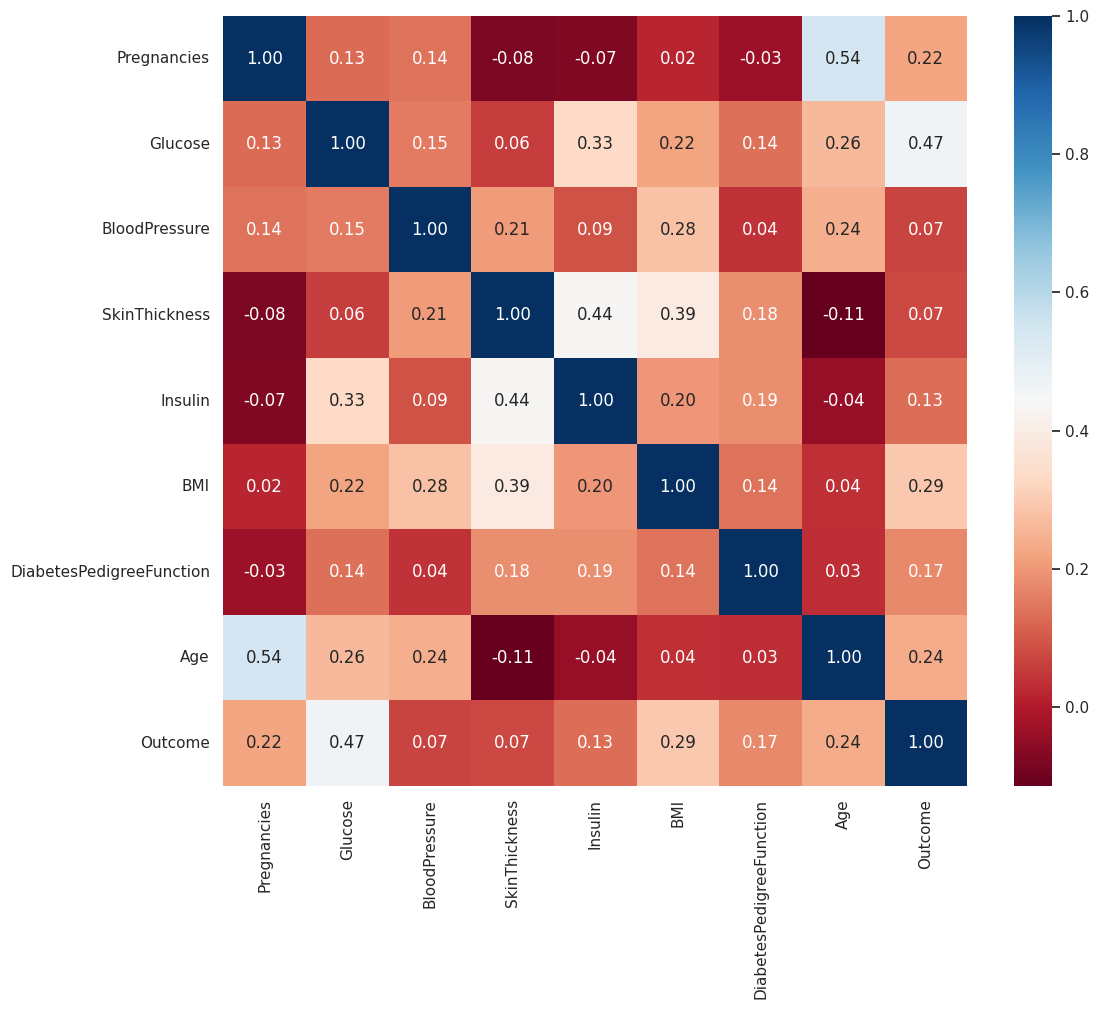

In [60]:
drop_list = high_correlated_cols(df, plot=True)

# Missing Value Analysis

In [61]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [62]:
zero_columns = [col for col in df.columns if (df[col].min() == 0) and col not in ["Pregnancies", "Outcome"]]

In [63]:
for col in zero_columns:
  df[col] = np.where(df[col] == 0, np.nan, df[col])

In [64]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [65]:
def missing_value_table(dataframe, na_names=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
  print(missing_df)
  if na_names:
    print("######### Na Names ###########")
    return na_columns

In [66]:
missing_value_table(df, na_names=True)

               n_miss   ratio
Insulin           374 48.7000
SkinThickness     227 29.5600
BloodPressure      35  4.5600
BMI                11  1.4300
Glucose             5  0.6500
######### Na Names ###########


['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [67]:
def fill_na_median(dataframe):
  dataframe = dataframe.apply(lambda x: x.fillna(x.median()) if x.dtype not in ["category", "object", "bool"] else x, axis=0)
  return dataframe

In [68]:
df = fill_na_median(df)

In [69]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Create a Base Model: Prediction Diabetes using Random Forest Classifier

In [70]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [72]:
rf_model = RandomForestClassifier(random_state=1).fit(X_train, y_train)

In [73]:
rf_model.predict(X_train)

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [74]:
accuracy_score(y_train, rf_model.predict(X_train))

1.0

In [75]:
accuracy_score(y_test, rf_model.predict(X_test))

0.7229437229437229

In [77]:
cv_results = cross_validate(rf_model, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

In [79]:
cv_results['test_accuracy'].mean()

0.7513878278584161

In [80]:
def RF_Model(dataframe, target, test_size=0.30, cv=10, results=False, plot_importance=False, save_results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
  rf_model = RandomForestClassifier(random_state=1).fit(X_train, y_train)
  if results:
    acc_train = accuracy_score(y_train, rf_model.predict(X_train))
    acc_test = accuracy_score(y_test, rf_model.predict(X_test))
    r2_train = rf_model.score(X_train, y_train)
    r2_test = rf_model.score(X_test, y_test)
    cv_results = cross_validate(rf_model, X, y, cv=cv, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
    print("################### Metrics #########################")
    print("Accuracy Train: ", "%.3f" % acc_train)
    print("Accuracy Test: ", "%.3f" % acc_test)
    print("R2 Train: ", "%.3f" % r2_train)
    print("R2 Test: ", "%.3f" % r2_test)
    print("Cross Validate (Accuracy): ", "%.3f" % cv_results['test_accuracy'].mean())
    print("Cross Validate (Precision): ", "%.3f" % cv_results['test_precision'].mean())
    print("Cross Validate (Recall): ", "%.3f" % cv_results['test_recall'].mean())
    print("Cross Validate (F1): ", "%.3f" % cv_results['test_f1'].mean())
    print("Cross Validate (Roc Auc): ", "%.3f" % cv_results['test_roc_auc'].mean())

    if plot_importance:
      feature_imp = pd.DataFrame({'Value': rf_model.feature_importances_, 'Feature': X.columns})
      plt.figure(figsize=(8, 6))
      sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
      plt.title("Importance Features")
      plt.tight_layout()
      plt.savefig("importance.jpg")
      plt.show()

    if save_results:
      joblib.dump(rf_model, "rf_model.pkl")

    return rf_model

################### Metrics #########################
Accuracy Train:  1.000
Accuracy Test:  0.797
R2 Train:  1.000
R2 Test:  0.797
Cross Validate (Accuracy):  0.764
Cross Validate (Precision):  0.699
Cross Validate (Recall):  0.589
Cross Validate (F1):  0.636
Cross Validate (Roc Auc):  0.827


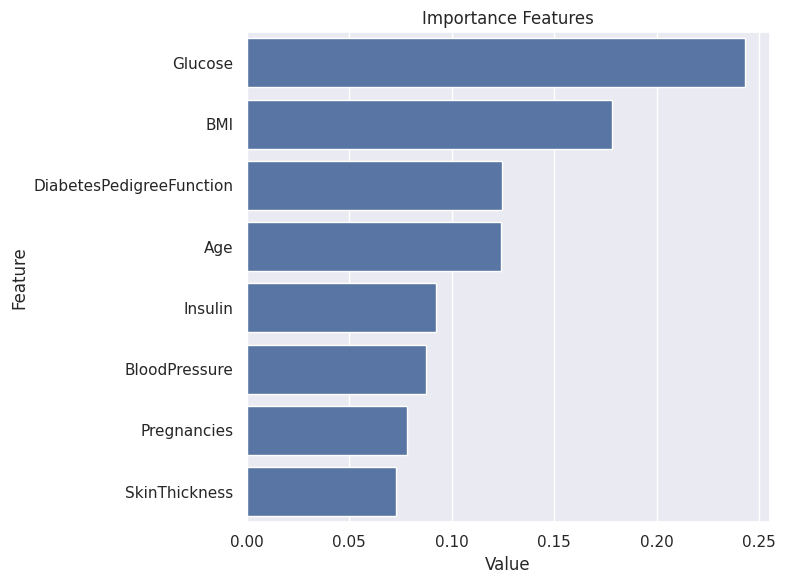

In [81]:
rf_model = RF_Model(df, "Outcome", results=True, plot_importance=True, save_results=True)

In [82]:
def load_model(pklfile):
  model_disc = joblib.load(pklfile)
  return model_disc

In [83]:
model_disc = load_model("rf_model.pkl")

In [84]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0000,72.0000,35.0000,125.0000,33.6000,0.6270,50,1


In [85]:
patient = [5, 150, 75, 36, 130, 34, 0.6, 55]

In [88]:
model_disc.predict(pd.DataFrame(patient).T)[0]

1